<a href="https://colab.research.google.com/github/pkrodev/AI_Tutorial/blob/main/Kopia_notatnika_liczby_rozpoznanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)


In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train=X_train/255.
X_test=X_test/255.

(-0.5, 27.5, 27.5, -0.5)

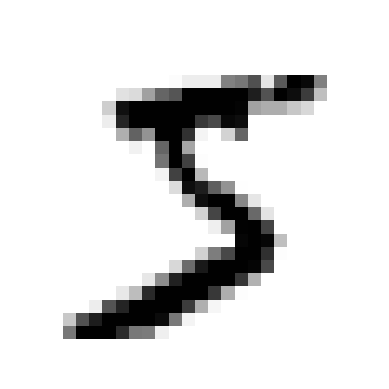

In [ ]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

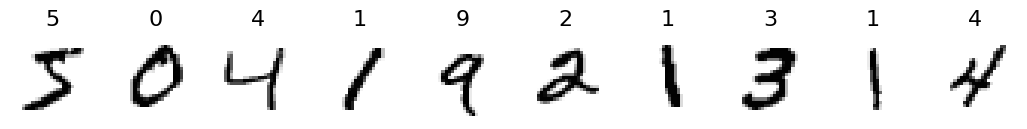

In [ ]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2930 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1411 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0742 - accuracy: 0.9766


In [ ]:
for result in model.predict(X_test[:3]):
    print(result)

1/1 [==============================] - 0s 75ms/step
[0.000000077516 0.000000002215 0.00002569924  0.00060182874  0.000000000004 0.000000119492 0.000000000003
 0.99937147     0.000000197449 0.000000677552]
[0.000000000312 0.00000718483  0.99998057     0.00001134644  0.             0.000000743588 0.000000004631
 0.000000000001 0.000000102458 0.            ]
[0.000000629848 0.99898475     0.00013689262  0.000012388495 0.00018002468  0.000013341598 0.00009083246
 0.00034161803  0.00023213713  0.000007383137]


In [ ]:
predictions=model.predict(X_test)
np.argmax(predictions,axis=1)

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0691 - accuracy: 0.9789 - 389ms/epoch - 1ms/step


[0.06909199059009552, 0.9789000153541565]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.293028,0.915833
1,0.141094,0.958067
2,0.106839,0.967417
3,0.086816,0.972800
4,0.074210,0.976583


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [ ]:
for result in model.predict(X_test[:5]):
    print(result)

1/1 [==============================] - 0s 17ms/step
[0.000000077516 0.000000002215 0.00002569929  0.0006018302   0.000000000004 0.000000119492 0.000000000003
 0.99937147     0.00000019745  0.000000677554]
[0.000000000312 0.00000718483  0.99998057     0.000011346462 0.             0.000000743588 0.000000004631
 0.000000000001 0.000000102459 0.            ]
[0.000000629847 0.99898475     0.00013689235  0.000012388483 0.00018002451  0.000013341572 0.00009083229
 0.0003416177   0.00023213669  0.000007383123]
[0.9990472      0.000000016139 0.0002886109   0.000000846148 0.000052295603 0.000003330109 0.000039402505
 0.000019124842 0.000000063026 0.00054914487 ]
[0.000001899371 0.000000060721 0.000029989142 0.000000149038 0.99609333     0.000002010167 0.000010698589
 0.00011961808  0.000001813198 0.0037404366  ]


In [ ]:
predictions=model.predict(X_test)
print(np.argmax(predictions,axis=1)[:5])

313/313 [==============================] - 0s 1ms/step
[7 2 1 0 4]


In [ ]:
predictions=model.predict(X_test)
y_pred=np.argmax(predictions,axis=1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [ ]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([149, 151, 247, 259, 274, 321, 445, 582, 591, 610], dtype='int64')

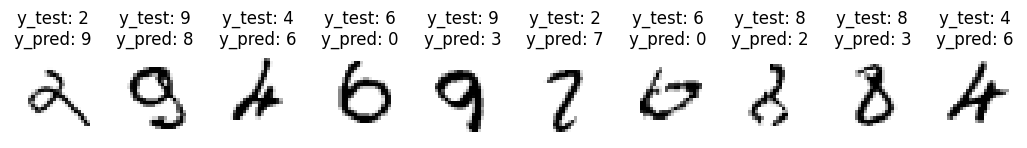

In [ ]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()
